# Premier modèle IA

## Sommaire

* [**Régression linéaire simple**](#RL1)
    * [Chargemen des données](#RL1-1)
    * [Visualisation des données](#RL1-2)
    * [Création du modèle](#RL1-3)
    * [Création de la fonction de coup](#RL1-4)
    * [Création de la fonction gradient](#RL1-5)
    * [Création de la fonction déscente de gradient](#RL1-6)
    * [Evaluation du modèle par le coefficient de détermination](#RL1-7)
    * [Représentation de la fonction de cout](#RL1-8)
* [**Régression linéaire multiple**](#RLM1)
    * [Chargement des données](#RLM1-1)
    * [Selection des variables les plus corrélés](#RLM1-2)
    * [Isolement des variable descriptives (X) et de la target (y)](#RLM1-3)
    * [Standardisation des variables](#RLM1-4)
    * [Mise en place de theta](#RLM1-5)
    * [Calcul du modèle](#RLM1-6)
    * [Représentation de l'évolution de la fonction de coût](#RLM1-7)
* [**Régression polynomiale**](#RP1)
    * [Calcul du modèle](#RP1-1)
    * [Représentation fonction de coût](#RP1-2)
    * [Evaluation du modèle](#RP1-3)
    * [Représentation de l'évolution du modèle](#RP1-4)
    * [Jeu de donnée vin rouge](#RP1-5)
* [**Scikit Learn**](#SKL)

## Regression linéaire simple <a class="anchor" id="RL1"></a>

### Importation des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

### Chargement des données <a class="anchor" id="RL1-1"></a>

Les données utilisées pour l'étude de la régréssion sont chargé sous forme de DataFrame, à partir du fichier *reg_simple.csv*, à l'aide de la librairie **pandas**.

In [2]:
data = pd.read_csv("./Data_Reg/reg_simple.csv") # importation des données
data.head() # affichage des 5 premières lignes du dataframe data

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


In [3]:
# Vérification de la taille du DataFrame
print(data.shape)

(27, 2)


### Visualisation des données <a class="anchor" id="RL1-2"></a>

Dans un premier temps on décide de visualiser les données à l'aide d'un nuage de point, en prenant en abscisse _**heure_rev**_ et en ordonnés _**note**_.

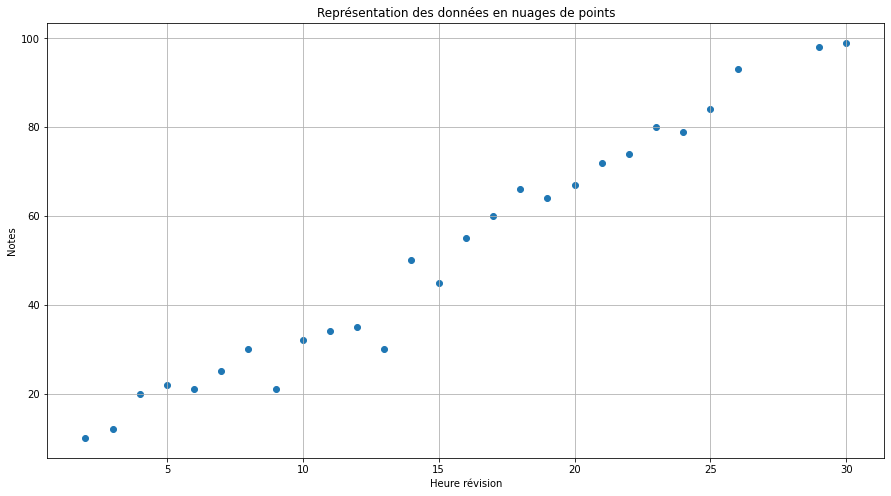

In [4]:
plt.figure(figsize = (15,8))
plt.scatter(data["heure_rev"], data["note"]) # Représentation en nuage de points
plt.title("Représentation des données en nuages de points") # Titre
plt.xlabel("Heure révision") # X label
plt.ylabel("Notes") # Y label
plt.grid(True) # Activation de la grille
plt.show()

Visuellement on constate déjà que les données ont une tendance linéaire.

###  Création du modèle <a class="anchor" id="RL1-3"></a>

Afin de calculer le modèle de ce jeu de données on met au point une fonction qui pourra être ensuite utilisé avec d'autres jeux de données. Pour ce faire nous décidons de travailler de manière matricielle, ainsi notre modèle linéaire :
<div align="center">$f(x) = ax + b$</div>
peut s'écrire de la manière suivante,
<div align="center">$F = X.\theta$</div>
avec,
$$X = \begin{bmatrix}x_{1} & 1\\
\vdots & \vdots\\ x_{n} & 1 
\end{bmatrix}$$ 

et 
$$\theta = \begin{bmatrix}a\\
b\end{bmatrix}$$

In [5]:
# Création de la fonction modélisant le modèle linéaire F
def model(X, theta):
    return X.dot(theta)

Maintenant que le model est définit, nous allons définir notre matrice notre matrice descriptive **X** et notre targer **y**, on prend respectivement les colonnes _**heure_rev**_ et _**note**_.

In [6]:
# Création de la matrice X
x = np.array(data["heure_rev"]) # Récupération des données x
m = len(x)
x_1 = np.ones(m) # Création de la colonne 1
X = np.column_stack((x,x_1)) # Concatenation de x et x_1 en colonne
X.shape

(27, 2)

In [7]:
# Récupétation de la target
y = np.array(data["note"]).reshape((-1,1))
y.shape

(27, 1)

Nous definissons maintenant la matrice **theta** qui contiendra nos coefficient *a* et *b*. C'est coefficient sont initialisés de manière aléatoire.

In [8]:
# Création de théta
theta = np.random.randn(2,1)
theta.shape

(2, 1)

On décide d'essayer notre fonction _**model()**_ pour vérifier son fonctionnement.

In [9]:
F = model(X, theta)
F.shape

(27, 1)

Nous pouvons maintenant représenter nos données ainsi que notre modèle (**F**) estimé. 

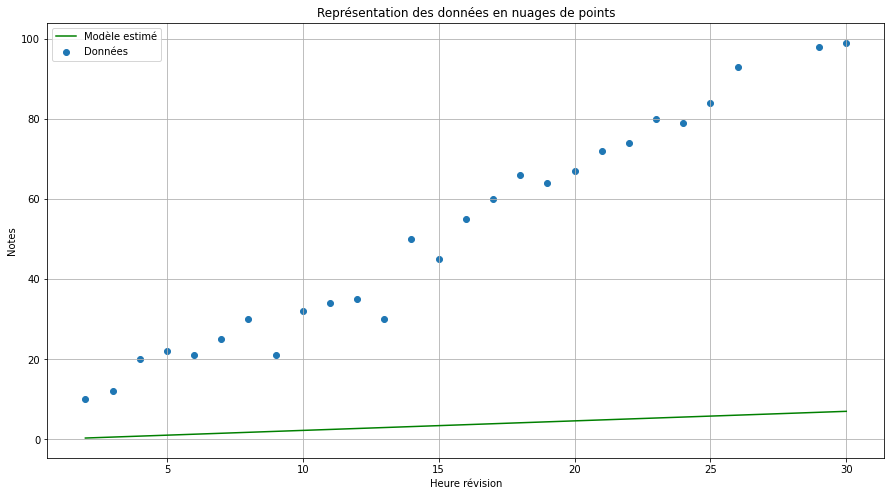

In [10]:
plt.figure(figsize = (15,8))
plt.scatter(data["heure_rev"], data["note"], label="Données") # Représentation en nuage de points
plt.plot(x, F, 'g', label="Modèle estimé")
plt.title("Représentation des données en nuages de points") # Titre
plt.xlabel("Heure révision") # X label
plt.ylabel("Notes") # Y label
plt.legend()
plt.grid(True) # Activation de la grille
plt.show()

### Création de la fonction de coup  <a class="anchor" id="RL1-4"></a>

Dans cette partie nous allons définir notre _**fonction_cout()**_, qui nous permet de calculer le coût de notre modèle vis à vis des données utilisés. Cette fonction s'écrit mathématiquement de la manière suivante :

<div align="center">$J(a,b) = \dfrac{1}{2m}\sum_{i=1}^{m}(ax + b - y)^2$</div>

Tout comme pour la fonction précedente, nous pouvons écrire la fonction sous forme matricielle, ce qui nous donne :

<div align="center">$J(\theta) = \dfrac{1}{2m}\sum(X.\theta - y)^2$</div>

In [11]:
def fonction_cout(X, Y, theta):
    m = len(X)
    return (1/(2*m))* np.sum(np.power((model(X, theta) - Y), 2))

On peut tester notre fonction, calculant le coût de notre moèle estimé précédement.

In [12]:
J = fonction_cout(X, y, theta)
print("Le coût de notre moèle est de : {}".format(J))

Le coût de notre moèle est de : 1452.72986383545


### Création de la fonction gradient <a id="RL1-5"></a>

Maintenant il nous est possible de définir la fonction permettant de calculer le gradient. Mathématiquement cette fonction correspond à la dérivée partielle par a et par b :

<div align="center">$\dfrac{\delta J(a,b)}{\delta a} = \dfrac{1}{m}\sum(ax + b - y)$</div>
<div align="center">$\dfrac{\delta J(a,b)}{\delta b} = \dfrac{1}{m}\sum(ax + b - y)$</div>

On peut écrire c'est équation sous forme matricielle :

<div align="center">$\dfrac{\delta J(\theta)}{\delta \theta} = \dfrac{1}{m}X^{T}(X.\theta - y)$</div>

In [13]:
def gradient(X, Y, theta):
    m = len(X)
    return (1/m) * np.transpose(X).dot((model(X, theta) - Y))

### Création de la fonction déscente de gradient <a id="RL1-6"></a>

A l'aide des fonctions définits précedemment, on peut définir une fonction de descente de gradient. L'objectif de cette nouvelle fonction est de re-évaluer les coefficients _**a**_ et _**b**_ (qui composent $\theta$), afin de minimiser le coût de notre modèle.

Cette fonction va donc suivre les étapes suivantes :
1. Re-estimation de $\theta$ en lui soustrayant le produit du *"learning rate" ($\alpha$)* et le calcul de gradient.
2. Calcul du modèle avec le nouveau $\theta$.
3. Estimation du coût de ce nouveau modèle.

Ces étapes vont se répété un certain nombre de fois (_**n_iterations**_) par le biais du boucle `for`.

La fonction prendra donc en paramètre d'entrées :
- **X** : la matrice de variable(s) descriptive(s)
- **y** : la matrice de la variable à prédire (*target*)
- **$\theta$** : la matrice contenant les coefficients à estimer
- **$\alpha$** : le pas d'apprentissage (*"learning rate"*)
- **n_iteration** : le nombre d'iteration à effectuer

In [14]:
def descente_gradient(X, Y, theta, alpha=1e-3, n_iterations=30):
    F_plot = [] # Variable permetant de stocker tout les modèles pour les représenter facilement
    J = [] # Variable pour stocker le coût
    
    for i in range(n_iterations):
        theta = theta - alpha*gradient(X, Y, theta) # Re-estimation de thêta
        F_plot.append(model(X, theta)) # Calcul du model avec le nouveau thêta
        J.append(fonction_cout(X, Y, theta)) # Calcul du coût du modèle
    
    return J, model(X, theta), F_plot

In [15]:
# Application de la fonction de descente de gradient.
J, F, F_plot = descente_gradient(X, y, theta)

print(F.shape) # Vérification du shape de F (dernier modèle calculé)

(27, 1)


### Evaluation du modèle par le coefficient de détermination <a class="anchor" id="RL1-7"></a>

Afin d'évaluer le modèle que nous avons estimé, nous decidons de définir une nouvelle fonction qui nous permettra de calculer le coefficient de détermination (_**R²**_) :
<div align="center">$R^{2} = 1 - \dfrac{\sum(y - F)^{2}}{\sum(y - \bar{y})^{2}}$</div>

In [16]:
def coeff_determination(y, F):
    return 1 - np.sum(np.power(y - F, 2)) / np.sum(np.power(y - np.mean(y), 2)) 

In [17]:
# Estimation du coefficient de détermination de notre modèle
R2 =  coeff_determination(y, F)

print("Le coefficient de détermination est de : {}".format(R2))

Le coefficient de détermination est de : 0.9732701957949346


Cette valeur de R² nous indique que notre modèle représente convenablement notre jeu de données.

### Représentation de la fonction de cout <a id="RL1-8"></a>

Il est également possible représenter l'évolution de la fonction de coût, c'est à dire le coup pour chaque modèle estimé, afin d'évaluer notre modèle.

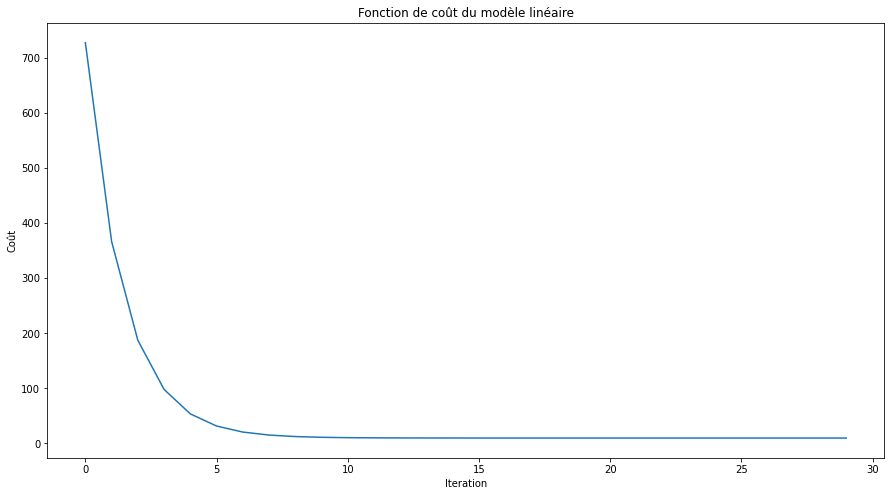

In [18]:
plt.figure(figsize = (15,8))
plt.plot(J)
plt.title("Fonction de coût du modèle linéaire")
plt.xlabel("Iteration")
plt.ylabel("Coût")
plt.show()

Par cette représentation on constate que notre modèle a atteint un plateau au bout de la dixième itération. Ce qui signifit que l'on a cessé d'amélioré le modèle à partir de cette itération. Pour s'en rendre compte on peut également retracer l'évolution de notre modèle au fur et à mesure des itérations.

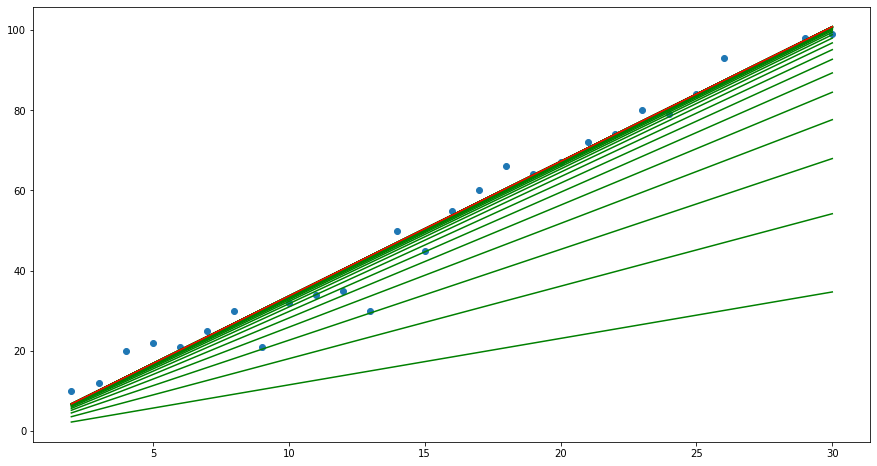

In [19]:
plt.figure(figsize = (15,8))
plt.scatter(data["heure_rev"], data["note"]) # Représentation en nuage de points
for i in range(len(F_plot)):
    plt.plot(x, F_plot[i], 'g')
plt.plot(x, F_plot[-1], 'r')
plt.show()

## Régression linéaire multiple <a id="RLM1"></a>

Pour ce travail sur la régression linéaire multiple on utilisera le jeu de données _**boston_house_prices.csv**_.

### Chargement des données <a id="RLM1-1"></a>

In [20]:
data_bhp = pd.read_csv("./Data_Reg/boston_house_prices.csv")
data_bhp.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
data_bhp.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Selection des variables les plus corrélés <a id="RLM1-2"></a>

Dans ce jeu de données notre variable targer est la colonne **"MEDV"**. Cependant au vu du nombre de variable descriptive nous decidons de faire la corrélation des variables afin de ne garder que celles qui ont la plus forte correlation. Pour ce faire nous décidons de réaliser une *"heatmap"* afin de visualisé les corrélation. 

In [22]:
import seaborn as sns

<AxesSubplot:>

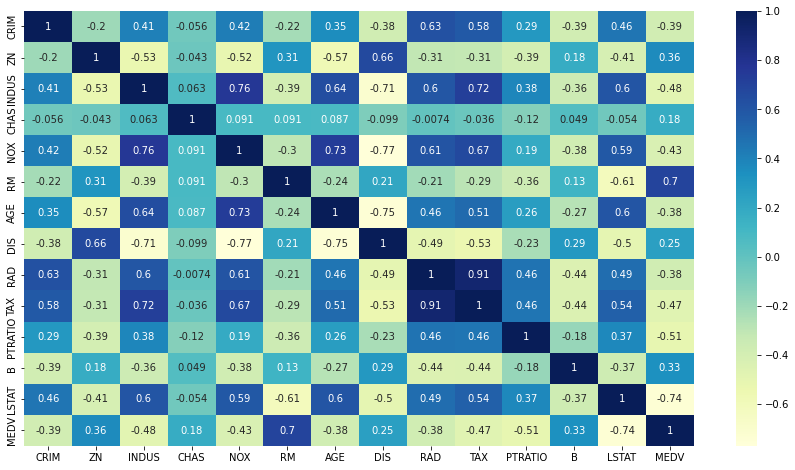

In [23]:
# Heatmap de la correlation de toutes les colonnes
plt.figure(figsize = (15,8))
sns.heatmap(data_bhp.corr(method="pearson"), annot=True,cmap="YlGnBu")

Cette représentation contient beaucoup d'information, nous décidons alors de calculer uniquement la corrélation des variables descriptives avec la varible cible. On regarde la valeur absolue des correlations pour ainsi plus facilement prendre en compte les corrélations négatives.

In [24]:
corr_result = data_bhp.corrwith(data_bhp["MEDV"], method="pearson")
print(corr_result.abs().sort_values(ascending=False))

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
dtype: float64


Les deux features les plus corrélés sont *LSTAT* et *RM*. Elles seront donc utilisé pour pour notre régression multiple. 

### Isolement des variable descriptives (X) et de la target (y) <a id="RLM1-3"></a>

Tout comme le modèle linéaire simple, la variable descriptive du modèle linéaire multiple peut s'écrire sous forme matricielle :
$$X = \begin{bmatrix}x^{(1)}_{1} & x^{(2)}_{1} & 1\\
\vdots & \vdots & \vdots\\ x^{(1)}_{n} & x^{(2)}_{n} & 1 
\end{bmatrix}$$ 

In [25]:
# Notre target "MEDV"
y = np.array(data_bhp["MEDV"]).reshape(len(data_bhp), 1)
print(y.shape)

(506, 1)


In [26]:
# Nos variables descriptives "LSTAT" et "RM"
x = np.array(data_bhp[["LSTAT", "RM"]])
print(x.shape)

(506, 2)


### Standardisation des variables <a id="RLM1-4"></a>

Afin d'éviter d'atteindre les limites de calcul de python, on décide de stadardiser nos données par la moyenne et l'écart-type :

<div align="center">$x = \dfrac{x - \mu}{\sigma}$</div>

In [27]:
# Moyenne des variables X
mux = np.repeat(np.mean(x, axis=0).reshape(1, x.shape[1]) , len(x), axis=0)
print(mux.shape)

# Moyenne de la targer Y
muy = np.repeat(np.mean(y, axis=0).reshape(1, y.shape[1]) , len(y), axis=0)
print(muy.shape)

(506, 2)
(506, 1)


In [28]:
# std des variables X
sigmax = np.repeat(np.std(x, axis=0).reshape(1, x.shape[1]) , len(x), axis=0)
print(sigmax.shape)

# std de la target Y
sigmay = np.repeat(np.std(y, axis=0).reshape(1, y.shape[1]) , len(y), axis=0)
print(sigmay.shape)

(506, 2)
(506, 1)


In [29]:
# Standardisation de x
X = (x - mux) / sigmax
X = np.column_stack((X, np.ones(len(x))))

# Standardisation de y
Y = (y - muy) / sigmay
print(X.shape, Y.shape)

(506, 3) (506, 1)


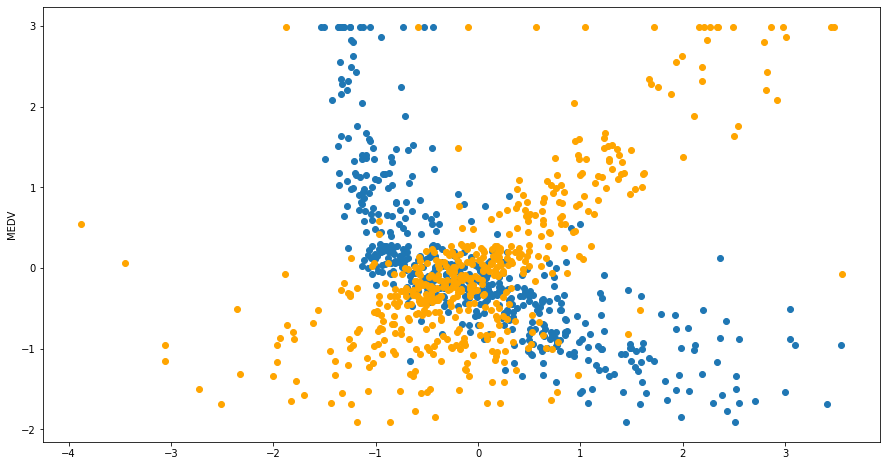

In [30]:
plt.figure(figsize=(15, 8))
plt.scatter(X[:, 0], Y)
plt.scatter(X[:, 1], Y, color='orange')
plt.ylabel("MEDV")
plt.show()

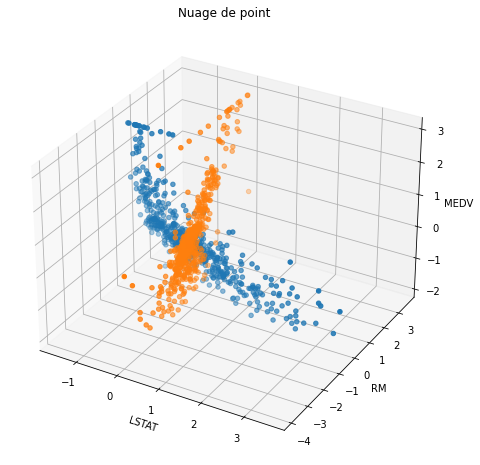

In [31]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:,0], np.zeros(Y.shape), Y)
ax.scatter3D(np.zeros(Y.shape), X[:,1], Y)
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
ax.set_title("Nuage de point")
plt.show()

### Mise en place de theta <a id="RLM1-5"></a>

In [32]:
# Création de théta
theta = np.random.randn(X.shape[1],1)
print(theta.shape)

(3, 1)


### Calcul du modèle <a id="RLM1-6"></a>

In [33]:
learning_rate = 5e-3 # Learning rate (alpha)
nb_i = 2000 # nombre d'itération

# Estimation du modèle
J, F, F_plot = descente_gradient(X, Y, theta, alpha=learning_rate, n_iterations=nb_i)
F.shape

(506, 1)

### Représentation de l'évolution de la fonction de coût  <a id="RLM1-7"></a>

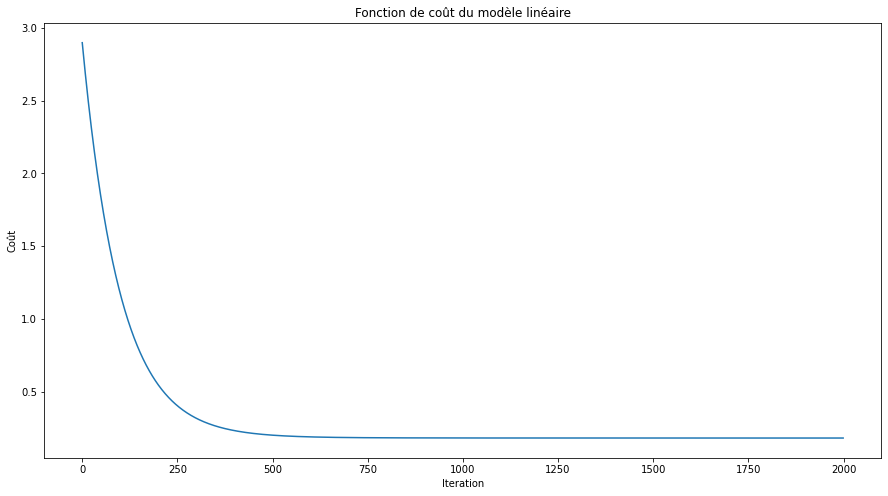

In [34]:
plt.figure(figsize = (15,8))
plt.plot(J)
plt.title("Fonction de coût du modèle linéaire")
plt.xlabel("Iteration")
plt.ylabel("Coût")
plt.show()

### Evaluation du modèle  <a id="RLM1-8"></a>

#### Coefficient de détermination

In [35]:
R2 =  coeff_determination(y, F)
print("Le coefficient de détermination est de :" + str(R2))

Le coefficient de détermination est de :-5.882811907754589


La valeur de coefficient obtenue nous indique que notre modèle n'est pas représentatif de nos données. Il ne sera donc pas possible de réaliser des predictions fiables.

#### Erreurs quadratiques moyennes

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mse = mean_squared_error(y, F)
print("L'erreur quadratique moyenne est de :" + str(mse))

L'erreur quadratique moyenne est de :581.0439263590134


L'erreur quadratique obtenu semble être trop élevé.

## Regression polynomiale <a id="RP1"></a>

Pour étudier la régression polynomiale on utilise le jeu de données _**Position_Salaries.csv**_. 

In [38]:
data_psalaire = pd.read_csv("./Data_Reg/Position_Salaries.csv")
data_psalaire.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


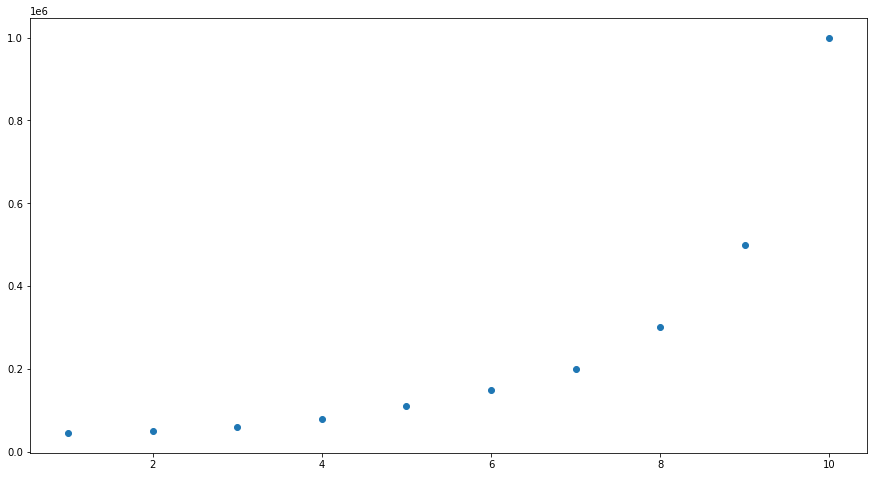

In [39]:
plt.figure(figsize = (15,8))
plt.scatter(data_psalaire["Level"], data_psalaire["Salary"])
plt.show()

Comme on peut le voir dans la représentation ci-dessus, notre jeu de données semble suivre un modèle polynomiale de degré 2, ce qui se traduit mathématiquement par :
<div align="center">$f(x) = ax^{2} + bx + c$</div>
Tout comme pour les modèles précedent il est possible de les ecrires sous forme avec :
$$X = \begin{bmatrix}x^{2}_{1} & x_{1} & 1\\
\vdots & \vdots & \vdots\\ x^{2}_{n} & x_{n} & 1 
\end{bmatrix}$$ 

In [40]:
x = data_psalaire.values[:,-2]
x = (x - x.min())/(x.max()-x.min())
print(x.min(), x.max())
X = np.column_stack((x**2,  x, np.ones(len(x))))
# X = np.column_stack((x2**2, x2, np.ones(len(x2))))
print(X.shape)

0.0 1.0
(10, 3)


Ici nous avons normalisé notre variable descriptive (*x*) pour éviter un problème d'overflow.

In [41]:
y = data_psalaire.values[:,-1].reshape(len(x),1)
print(y.shape)

(10, 1)


In [42]:
theta = np.random.randn(X.shape[1],1)
print(theta.shape)

(3, 1)


### Calcul du modèle <a id="RP1-1"></a>

In [43]:
learning_rate = 1e-2 # Learning rate (alpha)
nb_i = 3000 # nombre d'itération

J, F, F_plot = descente_gradient(X, y, theta, alpha=learning_rate, n_iterations=nb_i)
F.shape

(10, 1)

### Représentation de la fonction coût <a id="RP1-2"></a>

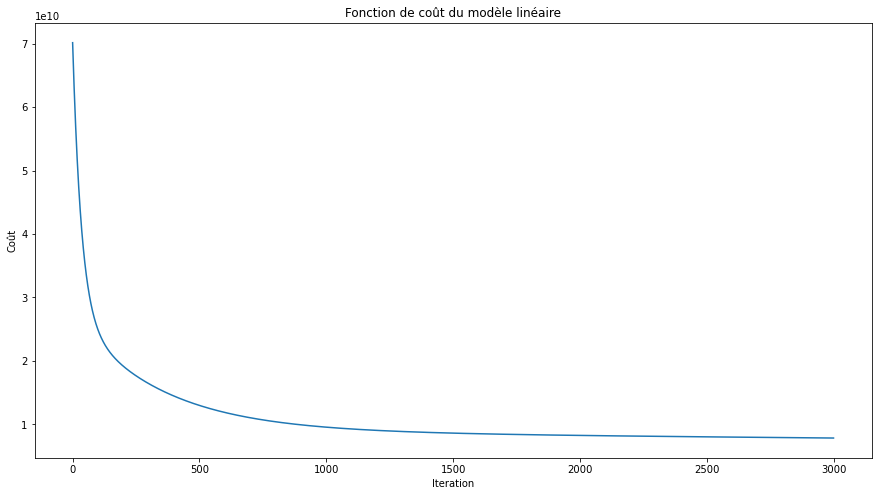

In [44]:
plt.figure(figsize = (15,8))
plt.plot(J)
plt.title("Fonction de coût du modèle linéaire")
plt.xlabel("Iteration")
plt.ylabel("Coût")
plt.show()

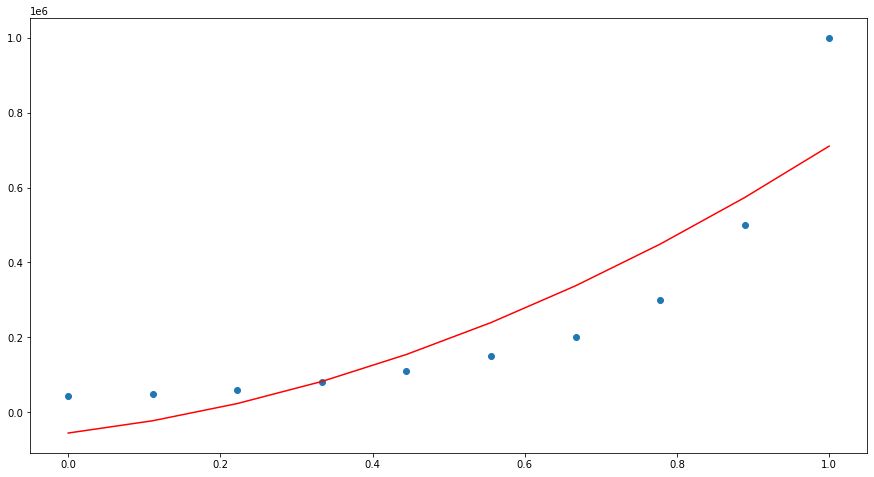

In [45]:
plt.figure(figsize = (15,8))
plt.scatter(x, y)
plt.plot(x, F, 'r')
plt.show()

### Evaluation du modèle <a id="RP1-3"></a>

#### Coefficient de détermination

In [46]:
R2 = coeff_determination(y, F)
print("Le coefficient de détermination est de : {}".format(R2))

Le coefficient de détermination est de : 0.8054772501139821


#### Eerreur quadratique moyenne

In [47]:
mse = mean_squared_error(y, F)
print("L'erreur quadratique moyenne est de : {}".format(mse))

L'erreur quadratique moyenne est de : 15690642681.99345


La valeur de R² est plutôt bonne, et concernant notre erreur quadratique elle semblerait élevé, cependant nos données target ont aussi un ordre de grandeur élevé.

### Représentation de l'évolution du modèle <a id="RP1-4"></a>

Ici nous avons décidé d'observer graphiquement l'évolution de notre modèle. Pour ce faire nous avons tracé les modèles estimés toutes les 1000 itérations

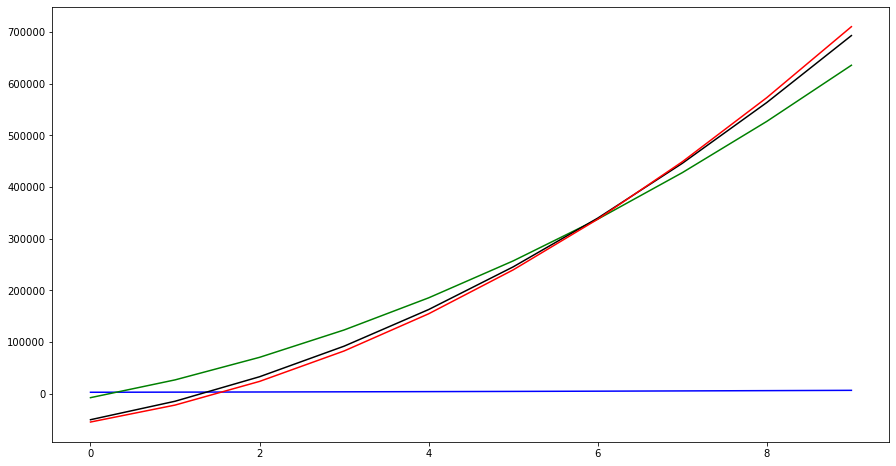

In [48]:
plt.figure(figsize = (15,8))
color = ['b', 'g', 'k', 'm', 'y']
cpt = 0
for i in range(0,nb_i, 1000):
    plt.plot(F_plot[i], color[cpt])
    cpt += 1
plt.plot(F, 'r')
plt.show()

### Jeu de donnée vin rouge <a id="RP1-5"></a>

Cette fois-ci nous nous intéressons au jeu de données _**"qualite-vin-rouge.csv"**_. 

In [49]:
data_vin = pd.read_csv("./Data_Reg/qualite-vin-rouge.csv")
data_vin.head()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


On a dans ce jeu de données 11 variable descriptive et 1 target, notre cible est la qualité du vin.

### Annalyse des correlations

Il a été décidé de réaliser la correlation des variables descriptives avec notre target afin de selectionner celle qui a la meilleur correlation.

In [50]:
corr_result = data_vin.corrwith(data_vin["qualité"], method="pearson")
print(corr_result.abs().sort_values(ascending=False))

qualité                      1.000000
alcool                       0.476166
acidité volatile             0.390558
sulphates                    0.251397
acide citrique               0.226373
anhydride sulfureux total    0.185100
densité                      0.174919
chlorures                    0.128907
acidité fixe                 0.124052
pH                           0.057731
dioxyde de soufre libre      0.050656
sucre résiduel               0.013732
dtype: float64


On applique également ici une stadardisation des valeurs afin d'évité un overflow.

In [51]:
x = data_vin.values[:, -1]
x = (x - x.mean())/x.std()
X = np.column_stack((x**2, x, np.ones(len(x))))
print(X.shape)

(1599, 3)


In [52]:
y = data_vin["alcool"].values.reshape(len(x),1)
print(y.shape)

(1599, 1)


In [53]:
theta = np.random.randn(X.shape[1], 1)
print(theta.shape)

(3, 1)


In [54]:
learning_rate = 1e-2 # Learning rate (alpha)
nb_i = 3000 # nombre d'itération

J, F, F_plot = descente_gradient(X, y, theta, alpha=learning_rate, n_iterations=nb_i)
F.shape

(1599, 1)

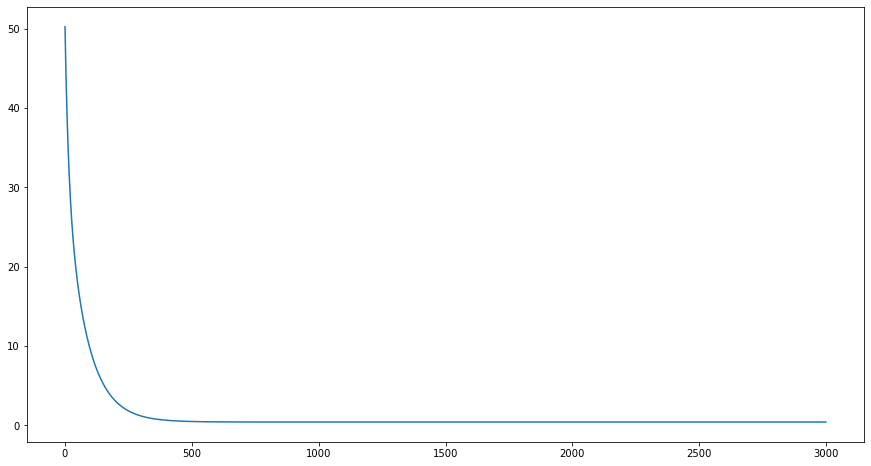

In [55]:
plt.figure(figsize = (15, 8))
plt.plot(J)
plt.show()

### Calcul du coefficient de détermination

In [56]:
R2 = coeff_determination(y, F)
print("Le coefficient de détermination est de : " + str(R2))

Le coefficient de détermination est de : 0.2507178013835304


### Calcul de l'erreur quadratique moyenne

In [57]:
mse = mean_squared_error(y, F)
print("L'erreur quadratique moyenne est de :" + str(mse))

L'erreur quadratique moyenne est de :0.8503882191447629


<Figure size 1080x576 with 0 Axes>

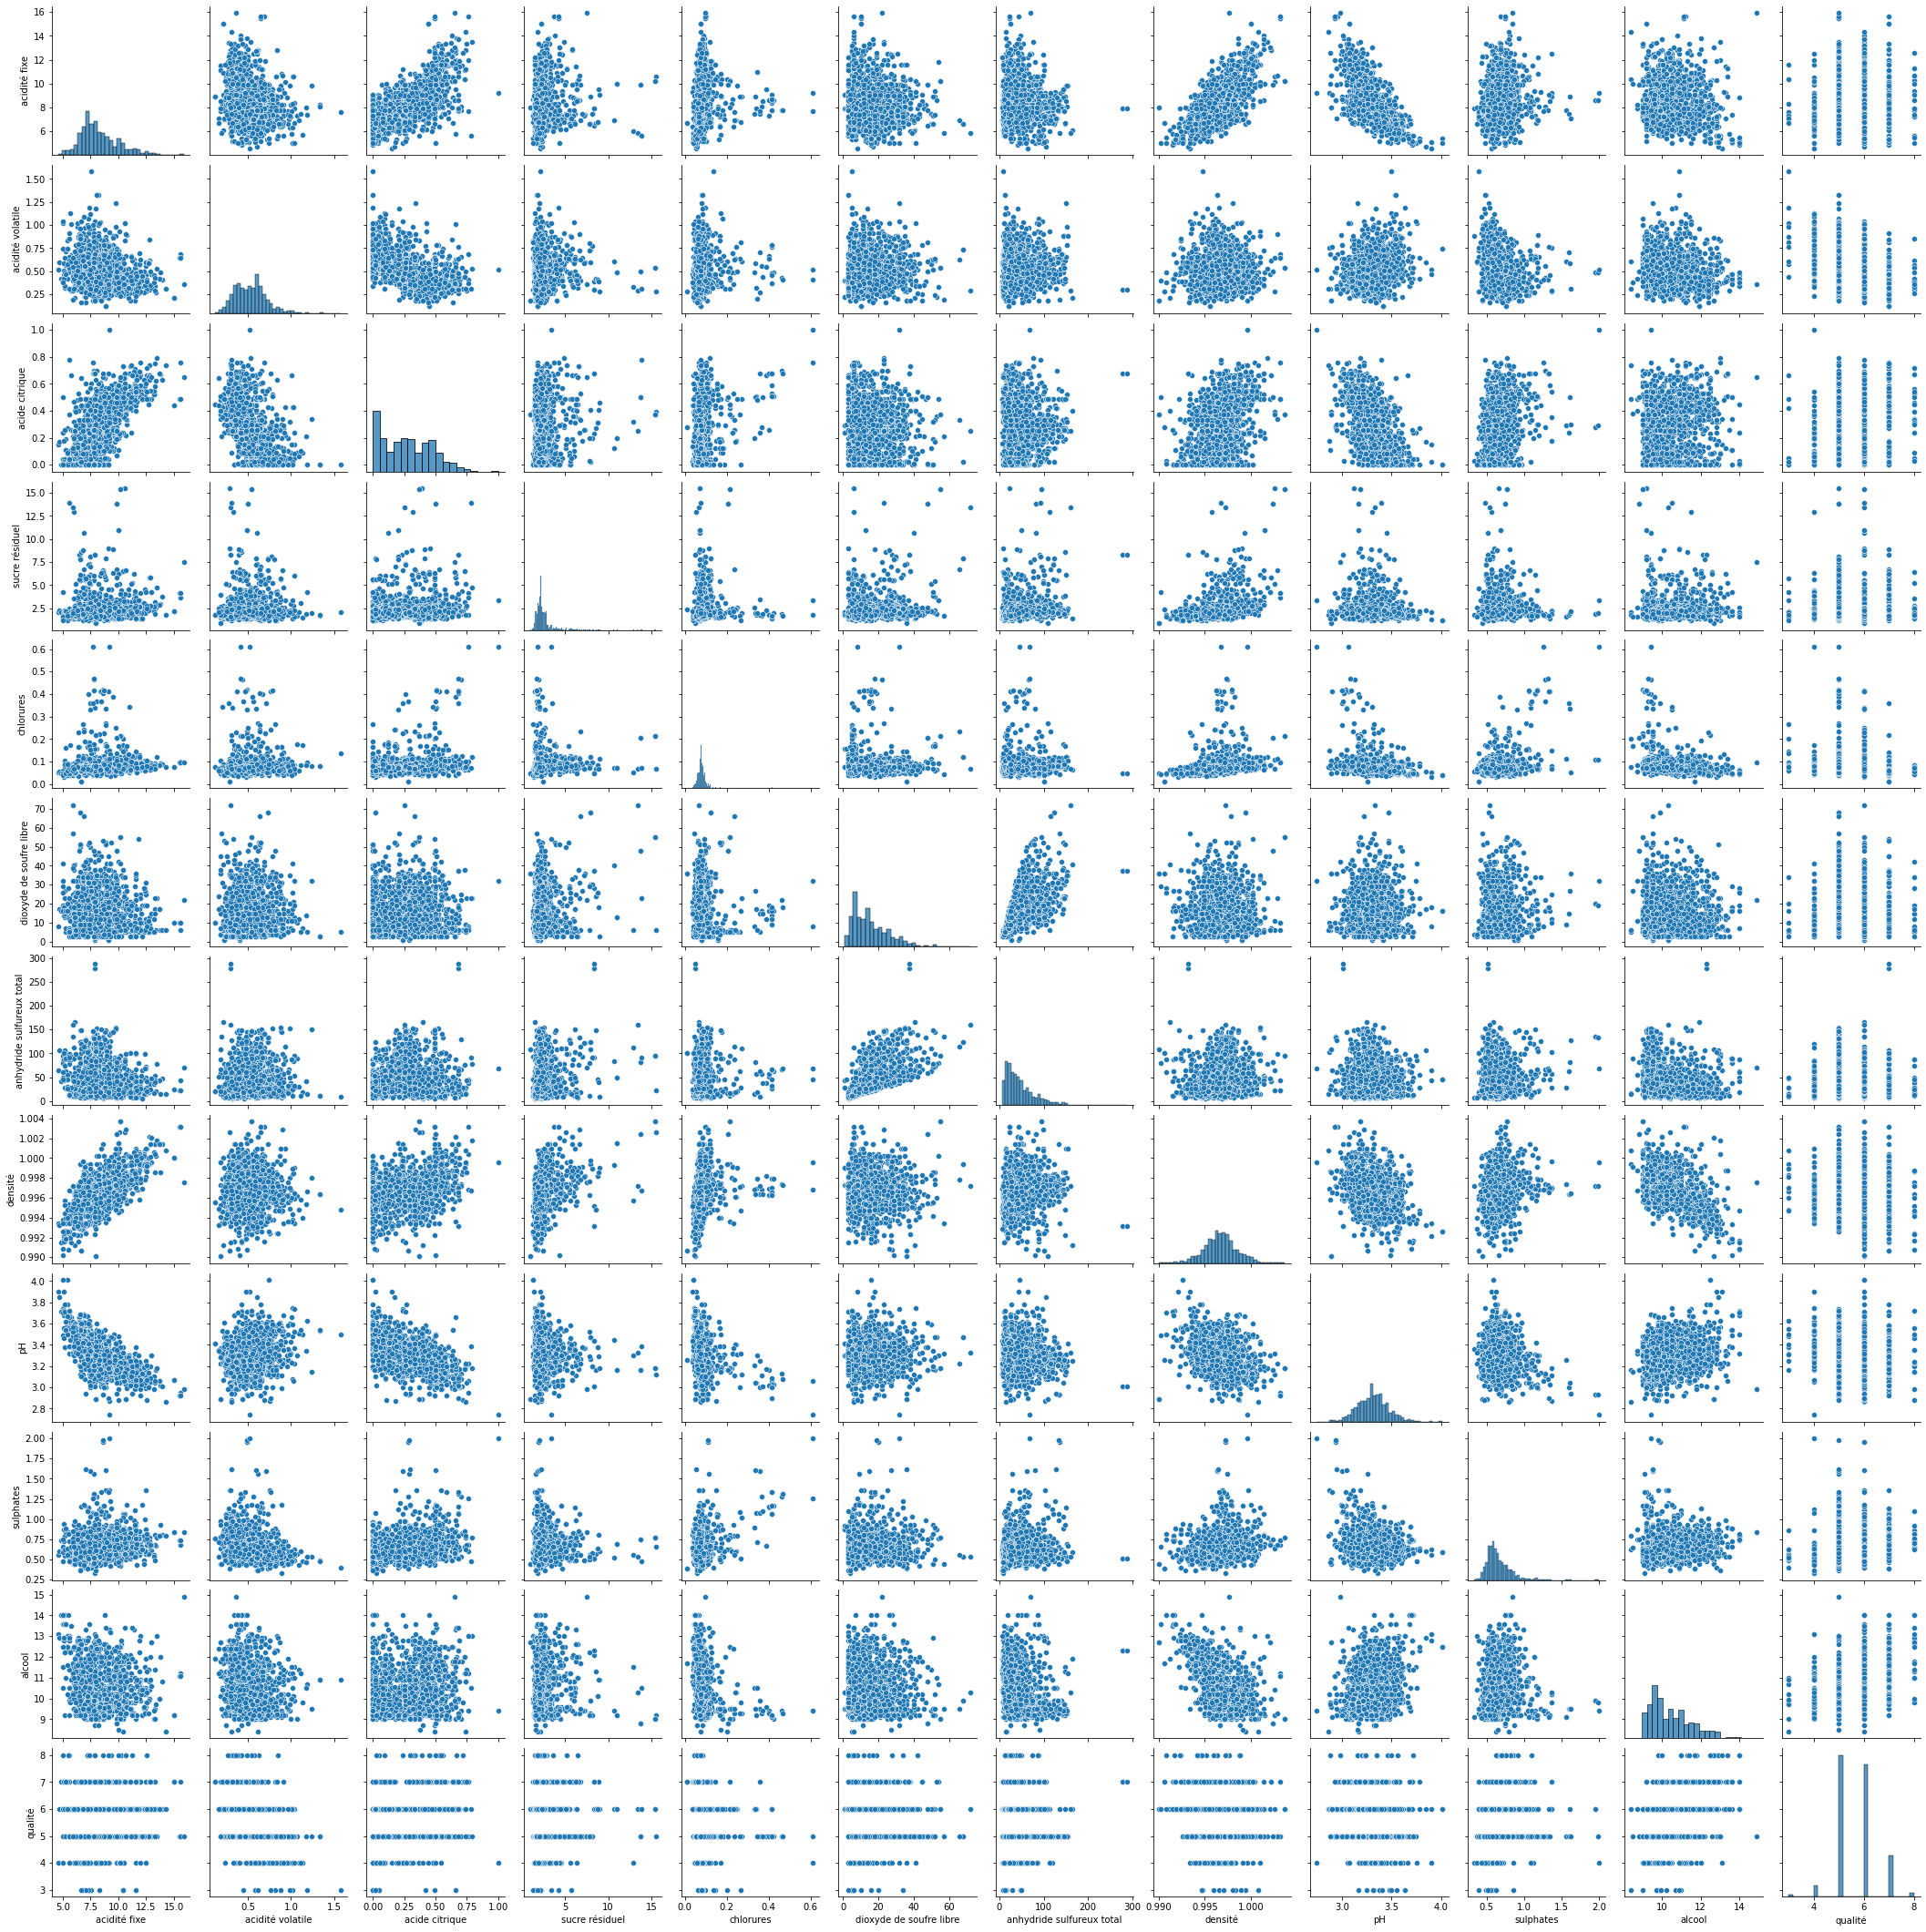

In [58]:
plt.figure(figsize = (15,8))
sns.pairplot(data_vin)
plt.show()

## Utilisation de Scikit-Learn

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Régression linéaire simple

In [60]:
data_regl = pd.read_csv("./Data_Reg/reg_simple.csv")
data_regl.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


In [61]:
X = data_regl["heure_rev"].values.reshape(len(data_regl),1)
# X = np.column_stack((X, np.ones(len(X))))
print(X.shape)

(27, 1)


In [62]:
y = data_regl["note"].values.reshape(len(data_regl),1)
print(y.shape)

(27, 1)


In [63]:
reg = LinearRegression().fit(X, y)
print(reg.coef_) # Les coefficients obtenu pour le modèle linéaire
print("Le coefficient de détermination est de : " + str(reg.score(X, y)))

[[3.34068243]]
Le coefficient de détermination est de : 0.9733203596683907


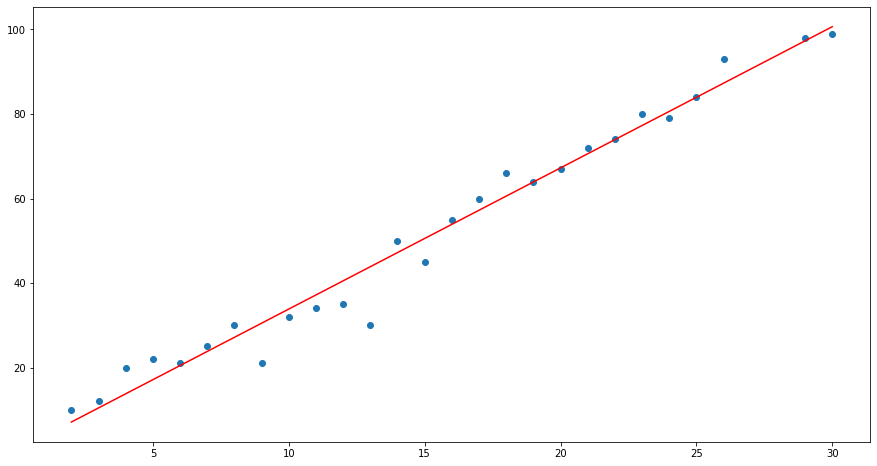

In [64]:
plt.figure(figsize=(15,8))
plt.scatter(X, y)
plt.plot(X, reg.predict(X), 'r')
plt.show()

### Régression multiple

Tout comme dans l'exercice précedent sur la régression multiple on utilise le jeu de données *\"boston_house_prices.csv\"*.

In [65]:
data_boston = pd.read_csv("./Data_Reg/boston_house_prices.csv")
data_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Connaissant déjà le jeu de données, nous savons que notre target est la colonne **MEDV** et que les deux variables les plus corrélé avec la target sont les colonnes **LSTAT** et **RM**. Ce sont donc ces deux colonnes que nous utiliserons pour effectuer la régréssion multiple.

In [66]:
X = data_boston[["RM","LSTAT"]].values
print(X.shape)

(506, 2)


In [67]:
y = data_boston["MEDV"].values.reshape(len(data_boston),1)
print(y.shape)

(506, 1)


In [68]:
reg_m = LinearRegression().fit(X, y)
print("Les coefficients déterminer par le modèle sont les suivant :")
print(reg_m.coef_) # Coefficient estimé par la régression multiple
print("------------------------------------------------------------")
print("Le coefficient de détermination est de : {}".format(reg_m.score(X, y)))

Les coefficients déterminer par le modèle sont les suivant :
[[ 5.09478798 -0.64235833]]
------------------------------------------------------------
Le coefficient de détermination est de : 0.6385616062603403


### Régression polynomiale

#### Jeu de données *\"Position_Salaire.csv\"*

In [69]:
data_psalaire.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


Tout comme dans l'exercice précedent, la target de notre jeu de données est la colonne **Salary**, et notre variable x est la colonne **Level**.

In [70]:
X = data_psalaire["Level"].values.reshape(len(data_psalaire),1)
print(X.shape)

(10, 1)


In [71]:
y = data_psalaire["Salary"].values.reshape(len(data_psalaire),1)
print(y.shape)

(10, 1)


In [72]:
x_poly = PolynomialFeatures(degree=2).fit_transform(X)
model_poly = LinearRegression().fit(x_poly, y)

In [73]:
print("Les coefficients déterminer par le modèle sont les suivant :")
print(model_poly.coef_) # Coefficient estimé par la régression multiple
print("------------------------------------------------------------")
print("Le coefficient de détermination est de : {}".format(model_poly.score(x_poly, y)))
print("L'erreur quadratique moyenne est de : {}".format(mean_squared_error(y, model_poly.predict(x_poly))))

Les coefficients déterminer par le modèle sont les suivant :
[[      0.         -132871.21212121   19431.81818182]]
------------------------------------------------------------
Le coefficient de détermination est de : 0.9162082221443942
L'erreur quadratique moyenne est de : 6758833333.333334


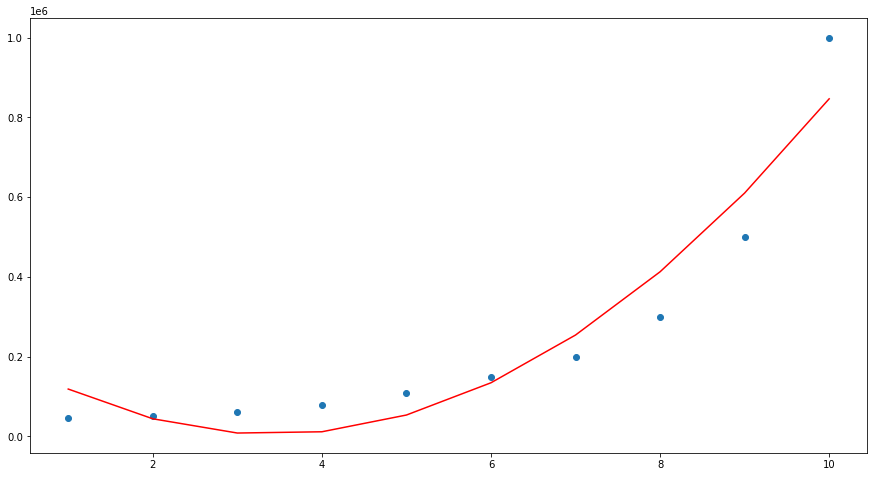

In [74]:
plt.figure(figsize=(15,8))
plt.scatter(X, y)
plt.plot(X, model_poly.predict(x_poly), 'r')
plt.show()

#### Jeu de données *\"qualite-vin-rouge.csv\"*

In [75]:
data_vin.head()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Tout comme dans l'exercice précedent nous prendrons la colonne **qualité** comme étant notre targe, et la colonne **alcool** comme étant notre feature.

In [76]:
X = data_vin["alcool"].values.reshape(len(data_vin), 1)
print(X.shape)

(1599, 1)


In [77]:
y = data_vin["qualité"].values.reshape(len(data_vin), 1)
print(y.shape)

(1599, 1)


In [78]:
x_poly = PolynomialFeatures(degree=2).fit_transform(X)
model_poly = LinearRegression().fit(x_poly, y)

In [79]:
print("Les coefficients déterminer par le modèle sont les suivant :")
print(model_poly.coef_) # Coefficient estimé par la régression multiple
print("------------------------------------------------------------")
print("Le coefficient de détermination est de : {}".format(model_poly.score(x_poly, y)))
print("L'erreur quadratique moyenne est de : {}".format(mean_squared_error(y, model_poly.predict(x_poly))))

Les coefficients déterminer par le modèle sont les suivant :
[[ 0.          0.80902384 -0.02059454]]
------------------------------------------------------------
Le coefficient de détermination est de : 0.2279548369538248
L'erreur quadratique moyenne est de : 0.5031885722407545


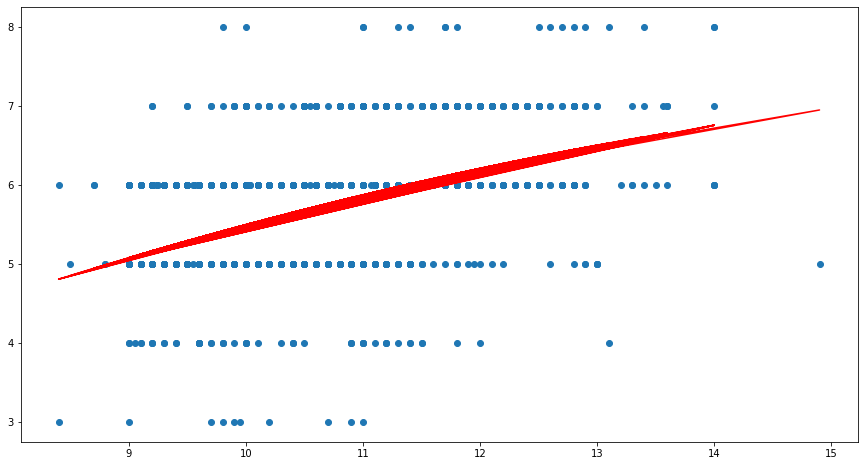

In [80]:
plt.figure(figsize=(15,8))
plt.scatter(X, y)
plt.plot(X, model_poly.predict(x_poly), 'r')
plt.show()

### Centrage et réduction des variables

In [81]:
# Moyenne des variables
# mu = np.repeat(np.mean(x, axis=0).reshape(1, x.shape[1]) , len(x), axis=0)
# mu.shape

In [82]:
# std des variables
# sigma = np.repeat(np.std(x, axis=0).reshape(1, x.shape[1]) , len(x), axis=0)
# sigma.shape

In [83]:
# print(x[0,:])
# print(mu[0,:])
# print(sigma[0,:])

In [84]:
# x1 = (x - mu) / sigma

In [85]:
# X = np.column_stack((x1, np.ones(len(x))))
# X.shape

In [86]:
# theta = np.random.randn(X.shape[1], 1)
# theta.shape

In [87]:
# test = X.transpose().dot(X)  # X'.X
# test.shape

In [88]:
# test1 = np.linalg.inv(test) # (X'.X)^-1

In [89]:
# test2 = X.transpose().dot(y)
# test2.shape

In [90]:
# Beta = test1.dot(test2)
# print(Beta)